# Generate Data and Train Model

This notebook will generate a dataset of noisy images of playing cards (J, Q, K), train a model using these images, and plot the learning curve. The model and dataset will be tracked using DVC (Data Version Control).

## Table of Contents
1. [Setup](#setup)
2. [Generate Dataset](#generate-dataset)
3. [Train Model](#train-model)
4. [Plot Learning Curve](#plot-learning-curve)
5. [Save Model and Dataset](#save-model-and-dataset)
6. [Conclusion](#conclusion)

## Setup
First, ensure you have the necessary libraries installed. You may need to install DVC and scikit-learn if you haven't already:
```bash
conda install -c conda-forge dvc
conda install scikit-learn
```

### Import Required Libraries

In [1]:
import os
import matplotlib.pyplot as plt # type: ignore
from model import build_model, train_model
from data_sets import generate_data_set

### Configuration
Set paths and parameters for the data generation and model training

In [2]:
# Configuration
N_SAMPLES = 1000  # Number of samples to generate
NOISE_LEVELS = [0.0, 0.2, 0.5, 0.8]  # Different noise levels to test
MODEL_DIR = 'models'
DATASET_DIR = 'data_sets'

# Create directories for saving models and datasets
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(DATASET_DIR, exist_ok=True)

## Generate Dataset
### Generate Testing and Training Images
Generate a dataset of images.

In [3]:
for noise_level in NOISE_LEVELS:
    noise_level_str = str(noise_level).replace('.', '_')  # Replace decimal point for file naming
    dataset_path = os.path.join(DATASET_DIR, f"dataset_noise_{noise_level_str}")
    generate_data_set(N_SAMPLES, dataset_path)


## Train Model
### Training Function
Train the model on the generated datasets.

In [ ]:
training_histories = {}  # Store training histories for each noise level

for noise_level in NOISE_LEVELS:
    noise_level_str = str(noise_level).replace('.', '_')  # For consistent naming
    dataset_path = os.path.join(DATASET_DIR, f"dataset_noise_{noise_level_str}")
    
    model = build_model()  # Build a new model
    history = train_model(model, n_validation=200, write_to_file=False)
    
    # Save the trained model
    model.save(os.path.join(MODEL_DIR, f"model_noise_{noise_level_str}.keras"))
    
    # Store history
    training_histories[noise_level_str] = history.history


## Plot Learning Curve
### Visualize Training History
Plot the learning curve for accuracy and loss over epochs for each noise level.

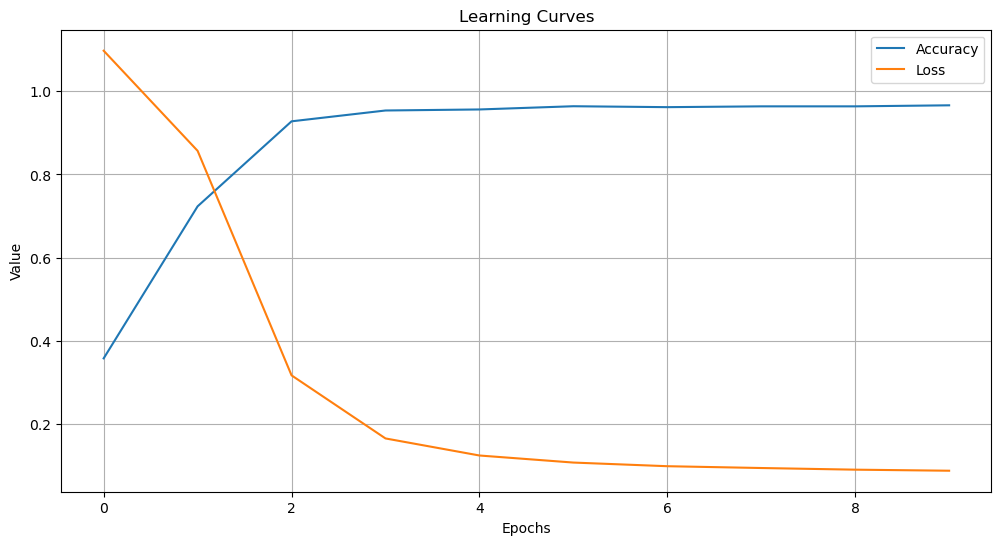

In [5]:
plt.figure(figsize=(12, 6))

for noise_level_str, history in training_histories.items():
    plt.plot(history['accuracy'], label=f'Accuracy (Noise {noise_level_str})')
    plt.plot(history['loss'], label=f'Loss (Noise {noise_level_str})')

plt.title('Learning Curves for Different Noise Levels')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('learning_curve.png')  # Save the learning curve figure
plt.show()

## Save Model and Dataset
### DVC Tracking
Use DVC to track the datasets and models.

In [ ]:
# Initialize DVC if not already done
!dvc init

# Add dataset and model to DVC
!dvc add datasets
!dvc add models

### Commit Changes
Commit the changes to DVC to track versions.

In [ ]:
# Commit changes
!git add .dvc .gitignore
!git commit -m "Track datasets and models with DVC"

## Conclusion
In this notebook, we generated a dataset of noisy card images, trained a model on the generated images, and plotted the learning curves. The models and datasets were saved in structured directories and tracked using DVC for version control.

### Explanation of Each Section
- **Setup**: Initializes the necessary libraries and configuration settings, including directories for datasets and models.
- **Generate Dataset**: Loops through different noise levels to generate datasets, saving each in a separate folder.
- **Train Model**: Builds and trains a model for each noise level, saving the model files with appropriate names.
- **Plot Learning Curve**: Plots accuracy and loss curves for each noise level and saves the figure.
- **Save Model and Dataset**: Shows how to use DVC to track datasets and models, including initializing DVC, adding files, and committing changes.